# Random Testing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import utils
import test_data

# Fake Data

## Plot Enrichment

In [1]:
import plot_enrichment

<Axes: ylabel='fraction modified bases'>

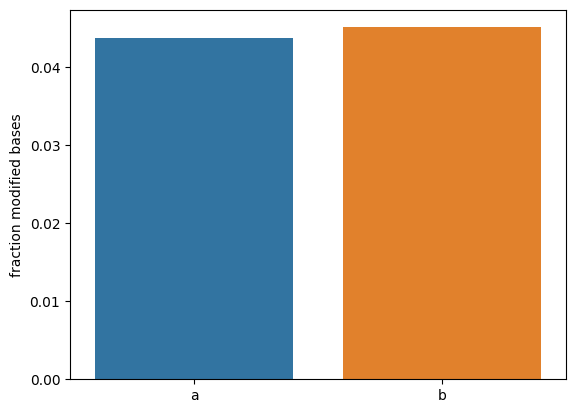

In [2]:
plot_enrichment.plot_enrichment_base(mod_file_names=['test.fake', 'test.fake'],
                                     bed_file_names=['test.bed', 'test.bed'],
                                     mod_names=['A', 'A'],
                                     sample_names=['a', 'b'])

## Plot Enrichment Profile

In [3]:
import plot_enrichment_profile

In [4]:
WINDOW_SIZE = 500
SMOOTH_WINDOW=50

<Axes: xlabel='pos', ylabel='fraction modified bases'>

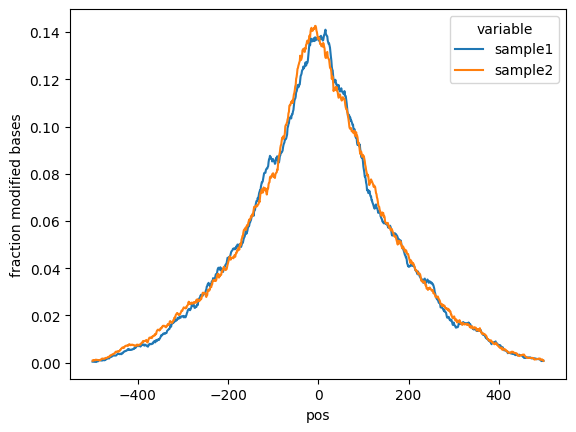

In [5]:
plot_enrichment_profile.plot_enrichment_profile_base(mod_file_names=['test1.fake', 'test2.fake'],
                                                     bed_file_names=['test1.bed', 'test2.bed'],
                                                     mod_names=['A', 'C'],
                                                     window_size=WINDOW_SIZE,
                                                     sample_names=['sample1', 'sample2'],
                                                     smooth_window=SMOOTH_WINDOW)

<Axes: xlabel='pos', ylabel='fraction modified bases'>

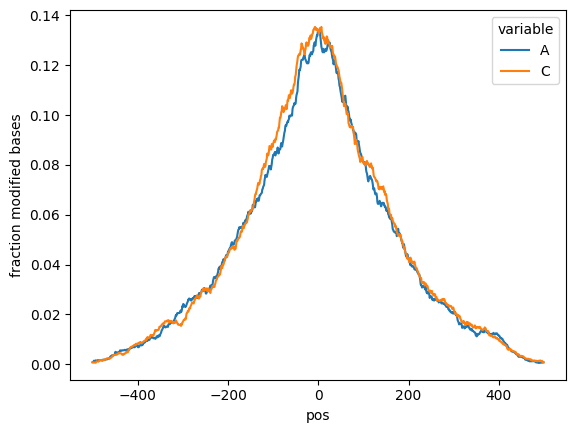

In [6]:
plot_enrichment_profile.plot_enrichment_profile_vary_mod(mod_file_name='test.fake',
                                                         bed_file_name='test.bed',
                                                         window_size=WINDOW_SIZE,
                                                         mod_names=['A', 'C'],
                                                         smooth_window=SMOOTH_WINDOW)

<Axes: xlabel='pos', ylabel='fraction modified bases'>

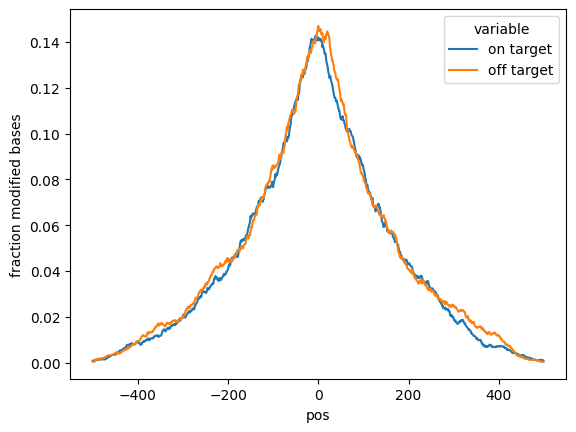

In [7]:
plot_enrichment_profile.plot_enrichment_profile_vary_regions(mod_file_name='test.fake',
                                                             bed_file_names=['test1.bed', 'test2.bed'],
                                                             mod_name='A',
                                                             window_size=WINDOW_SIZE,
                                                             sample_names=['on target', 'off target'],
                                                             smooth_window=SMOOTH_WINDOW)

<Axes: xlabel='pos', ylabel='fraction modified bases'>

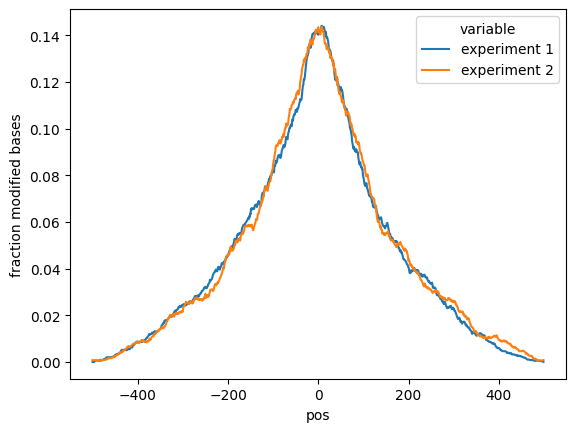

In [8]:
plot_enrichment_profile.plot_enrichment_profile_vary_experiments(mod_file_names=['test1.fake', 'test2.fake'],
                                                                 bed_file_name='test.bed',
                                                                 mod_name='A',
                                                                 window_size=WINDOW_SIZE,
                                                                 sample_names=['experiment 1', 'experiment 2'],
                                                                 smooth_window=SMOOTH_WINDOW)

## Plot Single Reads

In [1]:
import plot_single_reads

<Axes: xlabel='pos', ylabel='read_name'>

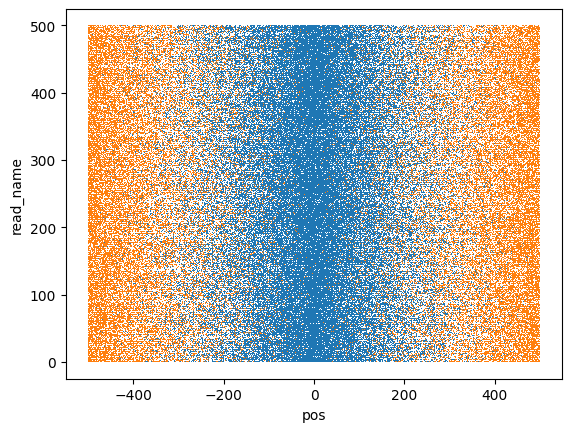

In [2]:
plot_single_reads.plot_single_reads_rectangle('test.bed', 'test.bed', ['A', 'C'])

# Real Data

## Plot Enrichment Profile

In [1]:
from pathlib import Path

import plot_enrichment_profile
from parser import parser

In [5]:
valid_bam_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/20231010_5thFloorTest_CTCF.bam')
bed_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/ENCFF797SDL.chm13v1.1.bed')
ref_genome_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/chm13.draft_v1.1.fasta')
test_output_dir = Path('./test_outputs')
test_output_dir.mkdir(exist_ok=True)

output_name = '.'.join([valid_bam_file.stem, bed_file.stem])

In [3]:
print(parser.parse_bam_modkit_pileup(
    input_file=valid_bam_file,
    output_path=test_output_dir,
    output_name=output_name,
    ref_genome=ref_genome_file,
    bed_file=bed_file,
    thresh=0.9,
    window_size=500,
    cores=None
))

Processing from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
No specified number of cores requested. 10 available on machine, allocating 5
Modification threshold of 0.9 will be treated as coming from range 0-1.


> parsed user-input threshold 0.9 for mod-code a
> parsed user-input threshold 0.9 for mod-code m
> parsing BED at /Users/jeremy/devspace/modkit_exploration/analysis/ENCFF797SDL.chm13v1.1.windowed.bed
> processed 41861 BED lines
> calculated chunk size: 7, interval size 100000, processing 700000 positions concurrently
> Using filter threshold 0.9 for mod code a.
> Using filter threshold 0.9 for mod code m.
> Done, processed 21602446 rows. Processed ~122041 reads and skipped zero reads.


0


Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed


<Axes: xlabel='pos', ylabel='fraction modified bases'>

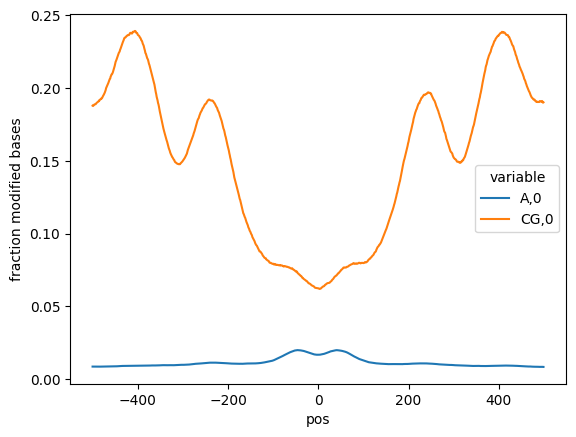

In [16]:
plot_enrichment_profile.plot_enrichment_profile_vary_mod(
    mod_file_name=f'{test_output_dir / output_name}.sorted.bed.gz',
    bed_file_name=bed_file,
    window_size=500,
    mod_names=['A,0','CG,0'],
    smooth_window=50
)

## Plot Enrichment

In [1]:
from pathlib import Path

import plot_enrichment
from parser import parser

In [2]:
valid_bam_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/20231010_5thFloorTest_CTCF.bam')
bed_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/ENCFF797SDL.chm13v1.1.bed')
ref_genome_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/chm13.draft_v1.1.fasta')
test_output_dir = Path('./test_outputs')
test_output_dir.mkdir(exist_ok=True)

output_name = '.'.join([valid_bam_file.stem, bed_file.stem])

test_mod_file = f'{test_output_dir / output_name}.sorted.bed.gz'

<Axes: ylabel='fraction modified bases'>

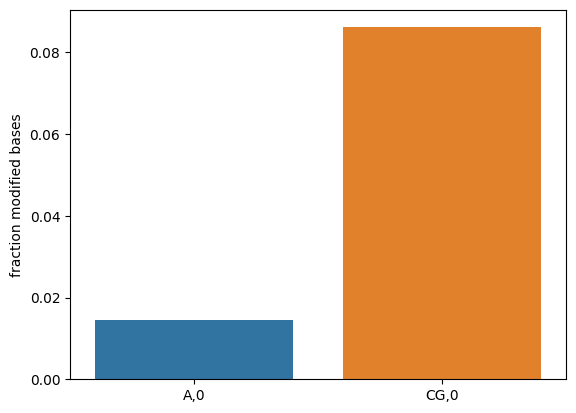

In [3]:
plot_enrichment.plot_enrichment_vary_mod(mod_file_name=test_mod_file,
                                        bed_file_name=bed_file,
                                        mod_names=['A,0','CG,0'])